In [ ]:
import sys
import numpy as np
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
import pandas as pd
df = pd.read_csv("final-v1.csv")

In [ ]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [ ]:
print(df.duplicated().sum())

3


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(782, 13)

In [ ]:
df["is_fake"].unique()


array([1, 0])

In [ ]:
df["is_fake"].value_counts(normalize=True)

,proportion
is_fake,
1,0.881074
0,0.118926


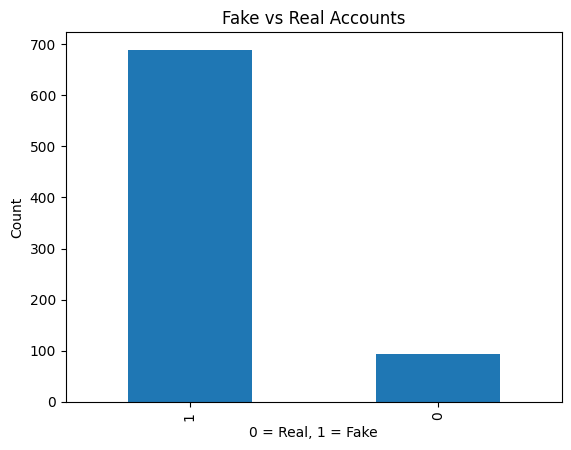

In [ ]:
import matplotlib.pyplot as plt

df["is_fake"].value_counts().plot(kind="bar")
plt.title("Fake vs Real Accounts")
plt.xlabel("0 = Real, 1 = Fake")
plt.ylabel("Count")
plt.show()


In [ ]:
# Features (all columns except target)
X = df.drop("is_fake", axis=1)

# Target
y = df["is_fake"]


In [ ]:
y.head()


,is_fake
0,1
1,1
2,1
3,1
4,1


In [ ]:
print("X shape:", X.shape)
print("Y shape:", y.shape)


X shape: (782, 12)
Y shape: (782,)


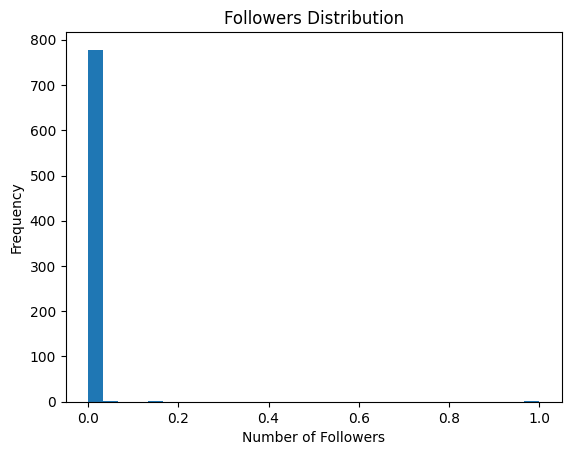

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["edge_followed_by"], bins=30)
plt.title("Followers Distribution")
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Numeric columns (need scaling)
numeric_cols = [
    "edge_followed_by",
    "edge_follow",
    "username_length",
    "full_name_length"
]

# Binary columns (NO scaling needed)
binary_cols = [
    "username_has_number",
    "full_name_has_number",
    "is_private",
    "is_joined_recently",
    "has_channel",
    "is_business_account",
    "has_guides",
    "has_external_url"
]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numeric columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [ ]:
import joblib

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (625, 12) (625,)
Testing set: (157, 12) (157,)


In [ ]:
print("Train label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


Train label distribution:
is_fake
1    0.8816
0    0.1184
Name: proportion, dtype: float64

Test label distribution:
is_fake
1    0.878981
0    0.121019
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict labels for test data
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9554140127388535


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.95      1.00      0.98       138

    accuracy                           0.96       157
   macro avg       0.98      0.82      0.87       157
weighted avg       0.96      0.96      0.95       157



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 12   7]
 [  0 138]]


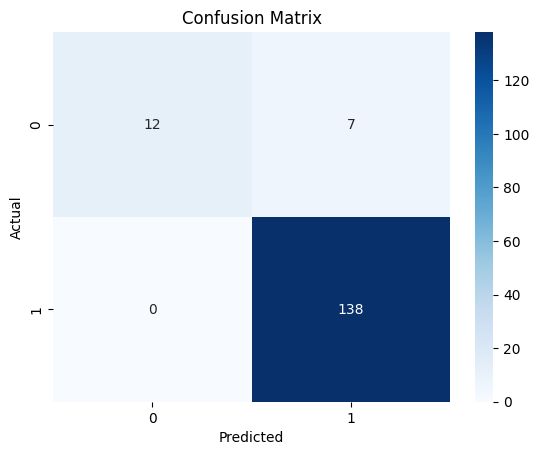

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Get importance scores
importances = rf_model.feature_importances_


In [ ]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
1,edge_follow,0.251141
0,edge_followed_by,0.149605
5,full_name_length,0.136377
7,is_joined_recently,0.122590
3,username_has_number,0.101896
6,is_private,0.097492
2,username_length,0.061165
11,has_external_url,0.038308
9,is_business_account,0.026501
4,full_name_has_number,0.014849


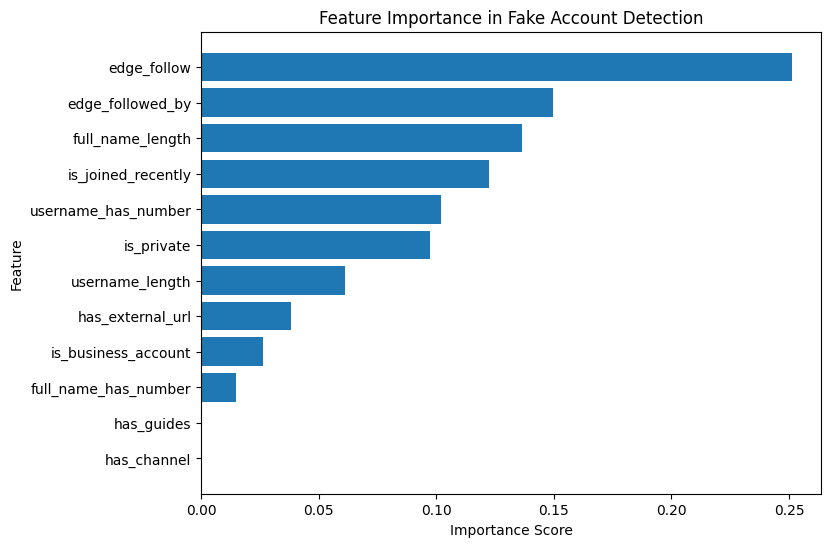

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Fake Account Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
feature_importance_df.head(5)


,Feature,Importance
1,edge_follow,0.251141
0,edge_followed_by,0.149605
5,full_name_length,0.136377
7,is_joined_recently,0.122590
3,username_has_number,0.101896


In [ ]:
import joblib

joblib.dump(rf_model, "fake_account_rf_model.pkl")


['fake_account_rf_model.pkl']

In [ ]:
!ls


fake_account_rf_model.pkl  final-v1.csv  sample_data  scaler.pkl


In [ ]:
loaded_model = joblib.load("fake_account_rf_model.pkl")

# Test a prediction (no output needed to understand value)
loaded_model.predict(X_test[:5])


array([1, 1, 1, 1, 0])

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load model and scaler
model = joblib.load("fake_account_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Fake Social Media Account Detection")
st.write("Model and scaler loaded successfully!")


Writing app.py


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.6.39:8501

  Stopping...


In [ ]:
!streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.6.39:8501

  Stopping...
  Stopping...


In [ ]:
from google.colab import files

files.download("fake_account_rf_model.pkl")
files.download("scaler.pkl")
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>